# Infinite square well in quantum mechanics

In this notebook we consider a quantum particle in a box. The potential energy is that of an infinite square well:

$$
V(x)=
\begin{cases}
0 \hspace{0.5cm} &\mbox{for} \hspace{0.5cm} |x|<\frac{a}{2} \\
\infty \hspace{0.5cm} &\mbox{for} \hspace{0.5cm} |x|>\frac{a}{2}
\end{cases}
$$

In the first part we study the eigenstates of the Hamiltonian, which are explained in the following video: https://youtu.be/pbZN8Pd8kac

In the second part, coming next week, we will investigate the time evolution of a quantum particle in a box after its position is measured.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cmath as cm
from collections import Iterable
from matplotlib import animation, rcParams
from IPython.display import HTML

In [2]:
# Set plotting style
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'
rcParams['font.size'] = 20
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2

# Do not display unfinished plots
plt.ioff()

## Parameters of the problem

The only relevant physical parameters of the problem are the width of the well $a$ and the mass of the particle $m$. We also have a fundamental constant, the reduced Planck constant $\hbar$. To simplify the numbers, we use atomic units, in which $\hbar=1$, the mass of an electron is $m=1$, and the unit of length is the Bohr radius $a_0=1$. We use the default values $a=2$ and $m=1$, so you can think of this as an electron moving within a well of the size of a hydrogen atom. Feel free to modify this parameters to see how they affect the results.

In [3]:
a = 2    # width of well (default a=2 is twice the Bohr radius)
m = 1    # mass in atomic units (detault m=1 is the mass of the electron) 
hbar = 1 # reduced Plank constant in atomic units

# As the wave function vanishes outside the well, the x-range to consider is only that within the well
x = np.arange(-a/2,a/2,0.01)

## Energy eigenvalues and eigenstates of the infinite square well

The first step is to determine the energy eigenvalues and eigenstates: you can find the full derivation in the video linked above. The energy eigenvalues are:

$$
E_n=\frac{\hbar^2\pi^2n^2}{2ma^2},
$$

where $n$ is a positive integer.

The energy eigenstates inside the well, corresponding to the interval $(-a/2,a/2)$, are given by:

$$
\psi_n(x)=
\begin{cases}
\sqrt{\frac{2}{a}}\cos\left(\frac{n\pi x}{a}\right) \hspace{0.5cm} &\mbox{for odd} \hspace{0.1cm} n, \\
\sqrt{\frac{2}{a}}\sin\left(\frac{n\pi x}{a}\right) \hspace{0.5cm} &\mbox{for even} \hspace{0.1cm} n. \\
\end{cases}
$$

Outside the well the wave function vanishes, $\psi_n(x)=0$.


In [4]:
# Energy eigenvalue n of the infinite square well
# n is the label of eigenstate n
# a is the width of the well
# hbar is Planck's reduced constant
# m is the mass of the particle
def energy(n,a,hbar,m):
    E = hbar*hbar*np.pi*np.pi*n*n/(2*m*a*a)
    return E

In [5]:
# Wave function of eigenstate n of the infinite square well
# n is the label of eigenstate n
# a is the size of the well
# x is the position variable
def wf(n,a,x):
    if type(n) != int:
        raise Exception('n must be an integer!')
    if not isinstance(x,Iterable):
        x = [x]
    if (n % 2) == 0:
        psi = np.array([np.sqrt(2/a)*np.sin(n*np.pi*xi/a) if abs(xi)<=a/2 else 0 for xi in x])
    else: 
        psi = np.array([np.sqrt(2/a)*np.cos(n*np.pi*xi/a) if abs(xi)<=a/2 else 0 for xi in x])
    return psi

### Plotting the wave function of individual energy eigenstates

It is interesting to play around with the energy level $n$, the potential well width $a$, and the particle mass $m$ to see how the energy eigenstates depend on these quantities.

In [16]:
# Choose the energy level (remember n is a positive integer)
n = 10

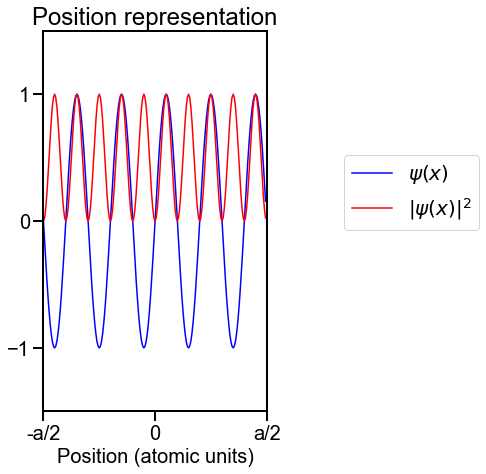

In [17]:
# Calculate the wave function 
wavefunction = wf(n,a,x)
# Calculate the absolute value squared of the wave function (remember the wave function is real)
wavefunction2 = wavefunction*wavefunction

# Set the figure parameters
fig, ax = plt.subplots(figsize=(4,7))

# Position wave function
# x-axis
ax.set_xlim([-a/2,a/2])
ax.set_xticks([-1,0,1])
ax.set_xticklabels(['-a/2','0','a/2'])
ax.set_xlabel('Position (atomic units)')
# y-axis
ax.set_ylim([-1.5,1.5])
ax.set_yticks([-1,0,1])
# Plot 
ax.plot(x,wavefunction,'-',color='b',label='$\psi(x)$')
ax.plot(x,wavefunction2,'-',color='r',label='$|\psi(x)|^2$')
ax.legend(bbox_to_anchor=(1.3,0.7))
line, = ax.plot([], [], lw=3)
ax.title.set_text('Position representation')

# Overall figure
plt.show()